 **Dataset Context**

The Indian Premier League (IPL), a cricketing spectacle that has captivated millions of fans across the globe. Officially known as the Vivo Indian Premier League for sponsorship reasons, this professional Twenty20 cricket league was established by the Board of Control for Cricket in India (BCCI) back in 2007, with the inaugural season commencing in 2008. 

The dataset covers the years 2008-2019,we'll be exploring data from the early seasons of the IPL. During these years, various iconic moments, matches, and performances occurred, contributing to the league's establishment as a premier T20 competition. Teams like the Mumbai Indians, Chennai Super Kings, Rajasthan Royals, and others participated in these seasons.

**Let's Import Necessary Libraries**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

**Let's Load the Dataset**

In [2]:
matches_uncleaned = pd.read_csv("/kaggle/input/cricket-data-analysis/matches.csv")
deliveries_uncleaned = pd.read_csv("/kaggle/input/cricket-data-analysis/deliveries.csv")

# **Get an overview**

In [3]:
#Lets get first few rows
print(matches_uncleaned.head())

   id  season       city        date                        team1  \
0   1    2017  Hyderabad  2017-04-05          Sunrisers Hyderabad   
1   2    2017       Pune  2017-04-06               Mumbai Indians   
2   3    2017     Rajkot  2017-04-07                Gujarat Lions   
3   4    2017     Indore  2017-04-08       Rising Pune Supergiant   
4   5    2017  Bangalore  2017-04-08  Royal Challengers Bangalore   

                         team2                  toss_winner toss_decision  \
0  Royal Challengers Bangalore  Royal Challengers Bangalore         field   
1       Rising Pune Supergiant       Rising Pune Supergiant         field   
2        Kolkata Knight Riders        Kolkata Knight Riders         field   
3              Kings XI Punjab              Kings XI Punjab         field   
4             Delhi Daredevils  Royal Challengers Bangalore           bat   

   result  dl_applied                       winner  win_by_runs  \
0  normal           0          Sunrisers Hyderabad     

In [4]:
print(deliveries_uncleaned.head())

   match_id  inning         batting_team                 bowling_team  over  \
0         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
1         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
2         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
3         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
4         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   

   ball    batsman non_striker    bowler  is_super_over  ...  bye_runs  \
0     1  DA Warner    S Dhawan  TS Mills              0  ...         0   
1     2  DA Warner    S Dhawan  TS Mills              0  ...         0   
2     3  DA Warner    S Dhawan  TS Mills              0  ...         0   
3     4  DA Warner    S Dhawan  TS Mills              0  ...         0   
4     5  DA Warner    S Dhawan  TS Mills              0  ...         0   

   legbye_runs  noball_runs  penalty_runs  batsman_runs  extra_runs  \
0        

**Lets get summary statistics**

In [5]:
print(matches_uncleaned.describe())

                 id       season  dl_applied  win_by_runs  win_by_wickets
count    756.000000   756.000000  756.000000   756.000000      756.000000
mean    1792.178571  2013.444444    0.025132    13.283069        3.350529
std     3464.478148     3.366895    0.156630    23.471144        3.387963
min        1.000000  2008.000000    0.000000     0.000000        0.000000
25%      189.750000  2011.000000    0.000000     0.000000        0.000000
50%      378.500000  2013.000000    0.000000     0.000000        4.000000
75%      567.250000  2016.000000    0.000000    19.000000        6.000000
max    11415.000000  2019.000000    1.000000   146.000000       10.000000


In [6]:
print(deliveries_uncleaned.describe())

            match_id         inning           over           ball  \
count  179078.000000  179078.000000  179078.000000  179078.000000   
mean     1802.252957       1.482952      10.162488       3.615587   
std      3472.322805       0.502074       5.677684       1.806966   
min         1.000000       1.000000       1.000000       1.000000   
25%       190.000000       1.000000       5.000000       2.000000   
50%       379.000000       1.000000      10.000000       4.000000   
75%       567.000000       2.000000      15.000000       5.000000   
max     11415.000000       5.000000      20.000000       9.000000   

       is_super_over      wide_runs       bye_runs    legbye_runs  \
count  179078.000000  179078.000000  179078.000000  179078.000000   
mean        0.000452       0.036721       0.004936       0.021136   
std         0.021263       0.251161       0.116480       0.194908   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.0000

# **Data Cleaning and Preprocessing**
**Let's Drop Unwanted Columns**

In [7]:
unwanted_columns = ["id","umpire1","umpire2","umpire3","dl_applied"]
matches = matches_uncleaned.drop(unwanted_columns, axis=1)

unwanted_columns2 = ["player_dismissed","dismissal_kind","fielder"]
deliveries = deliveries_uncleaned.drop(unwanted_columns2, axis=1)

**Lets check for Null values**

In [8]:
print(matches.isnull().sum())

season             0
city               7
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
winner             4
win_by_runs        0
win_by_wickets     0
player_of_match    4
venue              0
dtype: int64


In [9]:
#Lets drop the missing "city" values
matches = matches.dropna(subset=["city"])


In [10]:
print(deliveries.isnull().sum())

match_id         0
inning           0
batting_team     0
bowling_team     0
over             0
ball             0
batsman          0
non_striker      0
bowler           0
is_super_over    0
wide_runs        0
bye_runs         0
legbye_runs      0
noball_runs      0
penalty_runs     0
batsman_runs     0
extra_runs       0
total_runs       0
dtype: int64


In [11]:
print(matches.dtypes)

season              int64
city               object
date               object
team1              object
team2              object
toss_winner        object
toss_decision      object
result             object
winner             object
win_by_runs         int64
win_by_wickets      int64
player_of_match    object
venue              object
dtype: object


# **Exploratory Data Analysis (EDA)**

In [12]:
#Lets check team wise total wins
team_wins = matches["winner"].value_counts()
print(team_wins)

winner
Mumbai Indians                 109
Chennai Super Kings             98
Kolkata Knight Riders           92
Royal Challengers Bangalore     83
Kings XI Punjab                 81
Rajasthan Royals                75
Delhi Daredevils                66
Sunrisers Hyderabad             56
Deccan Chargers                 29
Gujarat Lions                   13
Pune Warriors                   12
Rising Pune Supergiant          10
Delhi Capitals                  10
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Name: count, dtype: int64


In [13]:
#Lets consider only top 5 teams

top_teams = team_wins.head(5)
print(top_teams)

winner
Mumbai Indians                 109
Chennai Super Kings             98
Kolkata Knight Riders           92
Royal Challengers Bangalore     83
Kings XI Punjab                 81
Name: count, dtype: int64


***Team Perfromance Analysis***

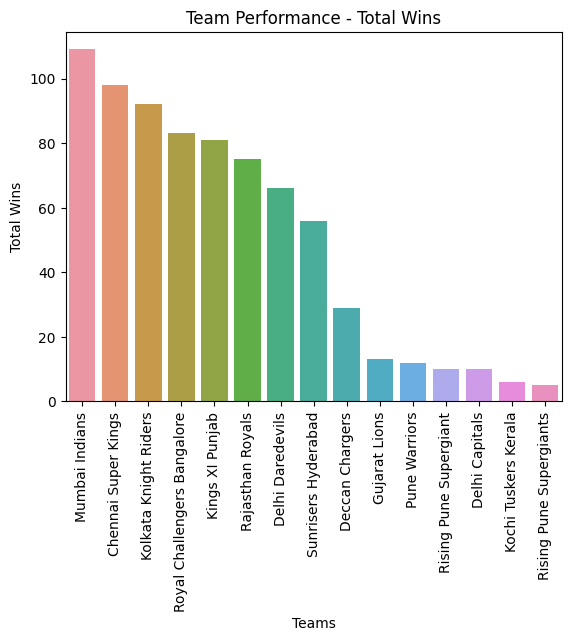

In [14]:
sns.barplot(x=team_wins.index, y=team_wins.values)
plt.title('Team Performance - Total Wins')
plt.xlabel('Teams')
plt.ylabel('Total Wins')
plt.xticks(rotation=90)
plt.show()

***Venue Analyis***

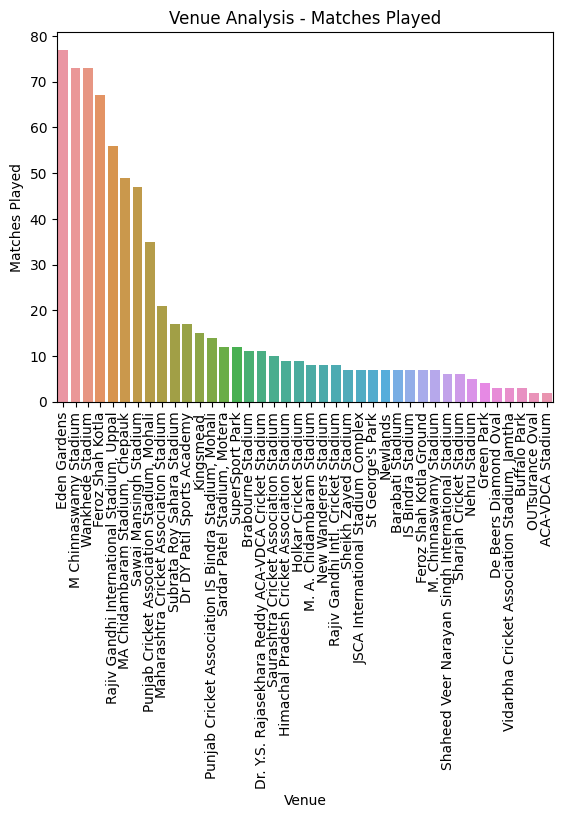

In [15]:
venue_counts = matches["venue"].value_counts()
sns.barplot(x=venue_counts.index, y=venue_counts.values)
plt.title("Venue Analysis - Matches Played")
plt.xlabel("Venue")
plt.ylabel("Matches Played")
plt.xticks(rotation=90)
plt.show()

***Lets Analyze that how toss winning team's decision influences the match results.***

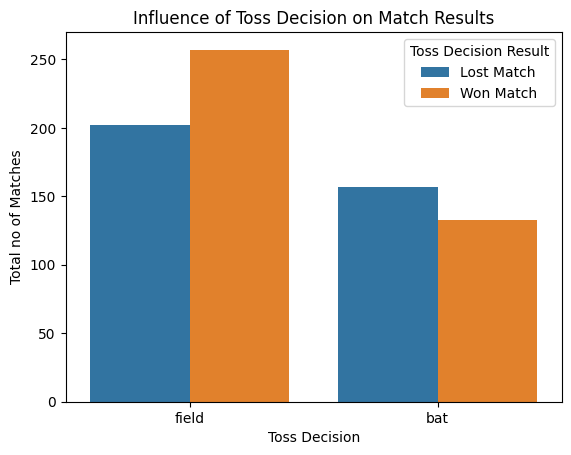

In [16]:
#Let's create a new columns which indicates the toss winning team also wins the match

matches["toss_win_match_win"] = matches["toss_winner"] == matches["winner"]

#Lets create a bar chart

sns.countplot(x="toss_decision", hue = "toss_win_match_win", data = matches)

plt.title("Influence of Toss Decision on Match Results")
plt.xlabel("Toss Decision")
plt.ylabel("Total no of Matches")
legend = plt.legend()
legend.set_title("Toss Decision Result")
legend.texts[0].set_text("Lost Match")
legend.texts[1].set_text("Won Match")
plt.show()

***Player Performance Analysis***

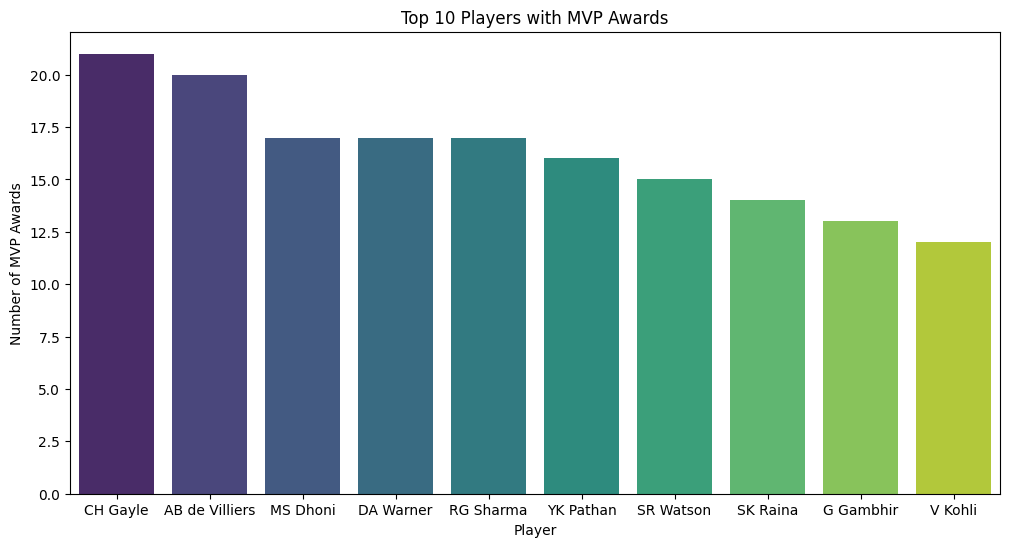

In [17]:
mvp = matches["player_of_match"].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=mvp.index, y=mvp.values, palette="viridis")
plt.title("Top 10 Players with MVP Awards")
plt.xlabel("Player")
plt.ylabel("Number of MVP Awards")
plt.show()


***Contribution of MVP Players in Wins***

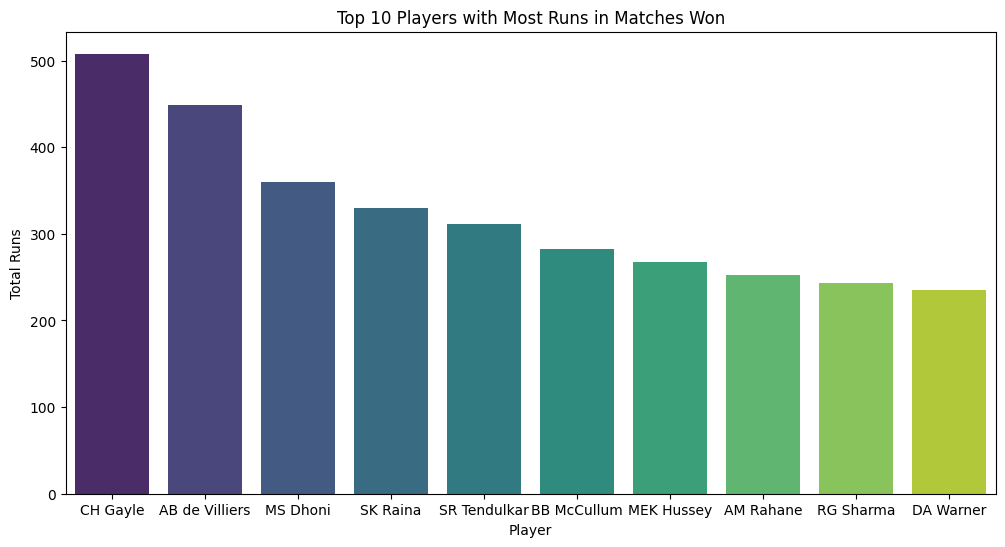

In [18]:
#Lets Filter the Data for Matches Won
won_matches = matches[matches["winner"] == matches["team1"]]

#lets analyze the performance of individual players in the matches won
player_performance = won_matches.groupby("player_of_match")[["win_by_runs", "win_by_wickets"]].sum()

top_scorers = player_performance.sort_values(by='win_by_runs', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_scorers.index, y=top_scorers['win_by_runs'], palette='viridis')
plt.title("Top 10 Players with Most Runs in Matches Won")
plt.xlabel("Player")
plt.ylabel("Total Runs")
plt.show()



**1.Question: Which team has the highest number of victories in the dataset?**

Answer: The team with the most wins is Mumbai Indians, securing a total of 109 victories.

**2.Question: In which stadium did the highest number of matches take place?**

Answer: Eden Gardens hosted the maximum number of matches.

**3.Question: Does the toss decision influence match results?**

Answer: Yes, teams that chose to field after winning the toss have the highest winning percentage.

**4.Question: Who has won the most "Man of the Match" awards?**

Answer: Chris Gayle has been awarded the most "Man of the Match" accolades.

**5.Question: Who is the most contributing player for match wins?**

Answer: Chris Gayle emerges as the most contributing player for match wins.